<a href="https://colab.research.google.com/github/Nutthida-k/Predicting-Lottory/blob/main/New_lotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
#Regression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sklearn.metrics as sm
from sklearn import metrics
#Classififer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

###About Dataset
Dataset เป็นข้อมูลจาก myhora หวยย้อนหลัง 30 ปี ตั้งแต่วันที่ 16 พฤษภาคม 2536 ถึงวันที่ 16 กันยายน 2566 รวมทั้งหมด 720 งวด โดยทำนายเฉพาะตัวเลข 2 ตัวล่าง มีการกำหนดตัวแปรต้นเป็น TIME และ PERIOD และตัวแปรตามเป็น LAST_2DIGIT_DOWN

In [ ]:
df = pd.read_csv('/content/New_Train-test.csv')

In [ ]:
df

,TIME,PERIOD,LAST_2DIGIT_DOWN,TEN,UNIT
0,1,1,21,2,1
1,2,2,6,0,6
2,3,1,86,8,6
3,4,2,0,0,0
4,5,1,11,1,1
...,...,...,...,...,...
715,716,2,62,6,2
716,717,1,11,1,1
717,718,2,67,6,7
718,719,1,91,9,1


Plot Bar chart เพื่อดูความถี่ของการออกคู่ของตัวเลข จากภาพจะแสดงให้เห็นว่า
- คู่ที่ออกบ่อยที่สุดจะเป็นเลข 69 และ 98 รองลงมาจะเป็นเลข 79, 85 และ 92
- คู่ที่ออกน้อยที่สุดจะเป็นเลข 84 รองลงมาคือ 01

<ipython-input-8-0d6c5e2c6894>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='LAST_2DIGIT_DOWN', data=df,palette='Set2')


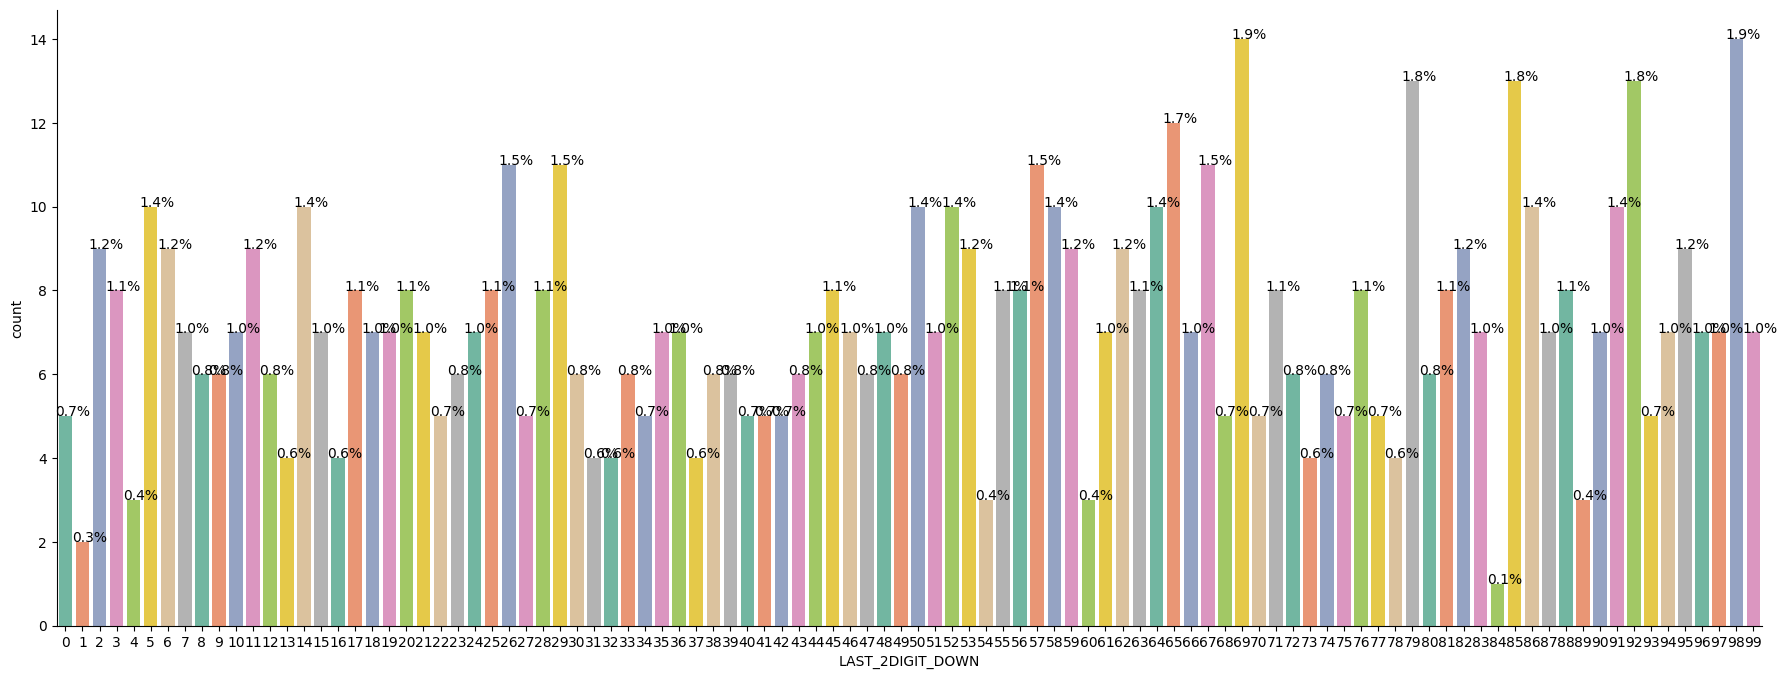

In [ ]:
#ดูตัวเลข 2 หลัก เลขไหนออกบ่อยสุด หรือออกน้อยสุดใน 30 ปีที่ผ่านมา
plt.figure(figsize=(22,8))
ax = sns.countplot(x='LAST_2DIGIT_DOWN', data=df,palette='Set2')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

# Train-test split

แบ่ง Train-Test dataset โดย
- Train 50% เป็นเลขที่ออกครึ่งปีแรก (6 เดือนแรก)
- Test 50% เป็นเลขที่ออกครึ่งปีหลัง (6 เดือนหลัง)

In [ ]:
x = df[['TIME','PERIOD']] #Time
y = df['LAST_2DIGIT_DOWN']
from sklearn.model_selection import train_test_split
# x_train, y_train, x_test, y_test = train_test_split(x, y, random_state= 42, train_size= 0.5)
x_train = x[:-360]
x_test = x[-360:]
y_train = y[:-360]
y_test = y[-360:]

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((360, 2), (360, 2), (360,), (360,))

In [ ]:
xt= x_train.values.reshape(-1,2)
xs= x_test.values.reshape(-1,2)
yt= y_train
ys= y_test

In [ ]:
xs.shape

(360, 2)

# Train Model

เพื่อเปรียบเทียบหา Model ที่ทำนายได้ดีที่สุด จึงได้มีการศึกษาตัว Algorithm ว่าตัวใดเหมาะสมกับข้อมูลชุดนี้ โดยเลือกมา 5 Algorithm ดังนี้

1.   Linear Regression
2.   Decition Tree

1.   Random Forest
2.   XgBoost

1.   Support vector machine(SVMs)


###Linear regression

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xt,yt)

#Predict
leg = model.predict(xs)

#MAE
print('MAE :',mean_absolute_error(ys,leg))
#R2
print("R2 score :", round(sm.r2_score(ys ,leg),3))

MAE : 24.46054379175428
R2 score : -0.002


แสดงตารางเปรียบเทียบค่า Predict, Actual และค่า Error จากการทำนาย

In [ ]:
pred_leg = pd.DataFrame({'Actual': ys, 'Predicted': leg//1,'Error': ys-leg})
pred_leg.head(10)

,Actual,Predicted,Error
360,58,53.0,4.878197
361,94,52.0,41.805975
362,82,53.0,28.880195
363,98,52.0,45.807973
364,69,53.0,15.882193
365,72,52.0,19.809970
366,21,53.0,-32.109817
367,69,52.0,16.817961
368,29,53.0,-24.107819
369,17,52.0,-35.180042


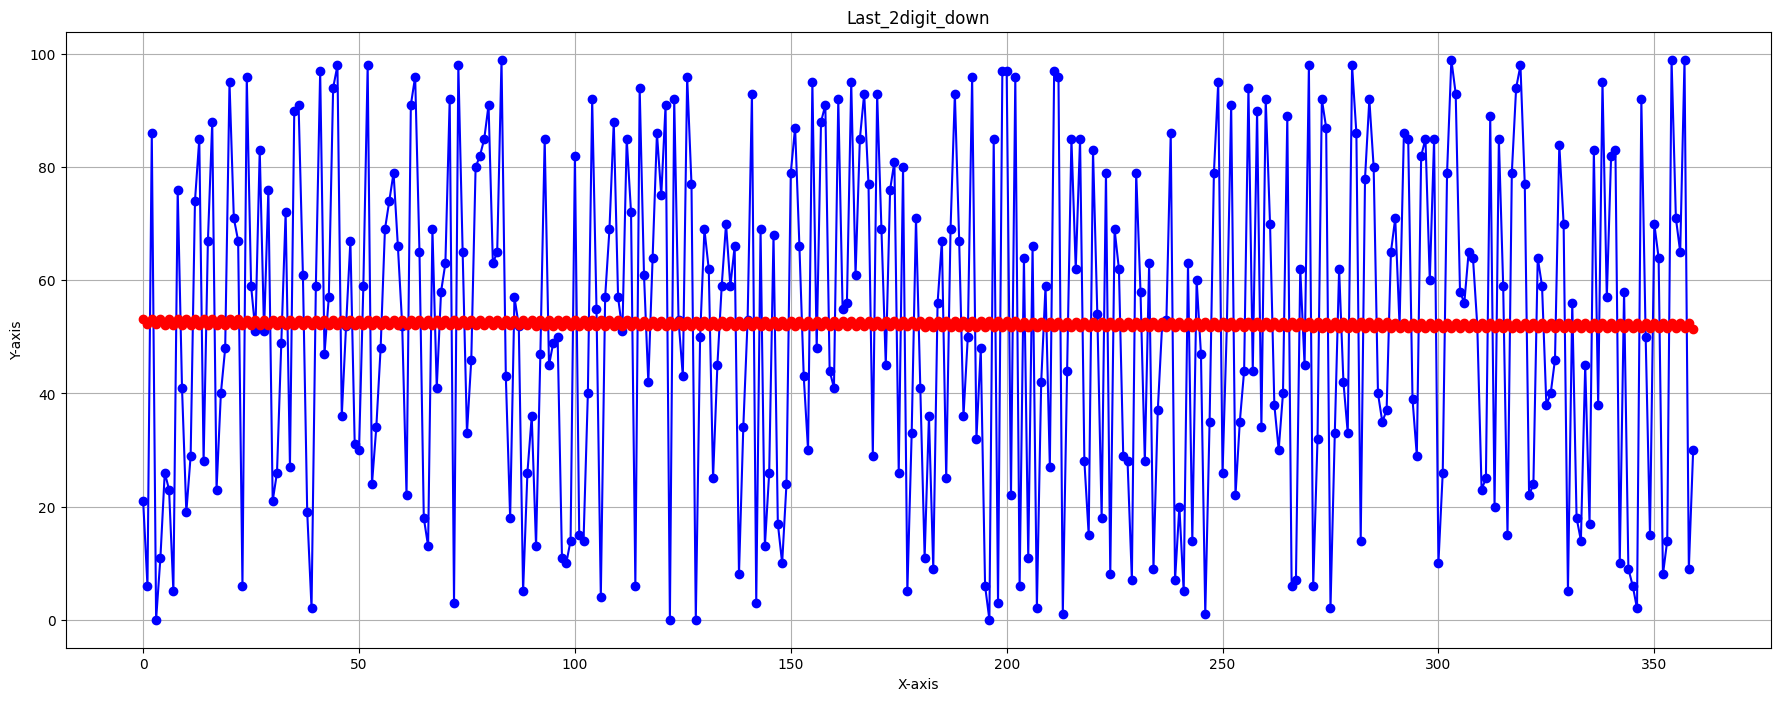

In [ ]:
#Plot graph 'Last_2digit_down'เทียบค่า predict กับ Actual
values = df['LAST_2DIGIT_DOWN'][0:360] #เริ่มจากงวดล่าสุด
pr = leg
# Create a line plot
plt.figure(figsize=(22,8))
plt.plot(values, marker='o', linestyle='-', color='blue', label='Data')
plt.plot(pr, marker='o', linestyle='--', color='red', label='Predict')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Last_2digit_down')

plt.grid()
plt.show()

###Decision tree Model

In [ ]:
#Decision tree Model
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(xt,yt)

#predict
ptree = tree.predict(xs)

print("F1 score is",(f1_score(ys, ptree, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys, ptree)))
# probtree = tree.predict_proba(xs)
# roc_auc_score(ys,probtree ,multi_class = 'ovr', average = 'macro')

F1 score is 0.01245760412427079
Accuracy_score is 0.011111111111111112


แสดงตารางเปรียบเทียบค่า Predict, Actual และค่า Error จากการทำนาย

In [ ]:
pred_tree = pd.DataFrame({'Actual': ys, 'Predicted':ptree,'Error': ys-ptree})
pred_tree.head(10)

,Actual,Predicted,Error
360,58,11,47
361,94,26,68
362,82,11,71
363,98,5,93
364,69,23,46
365,72,5,67
366,21,19,2
367,69,29,40
368,29,19,10
369,17,29,-12


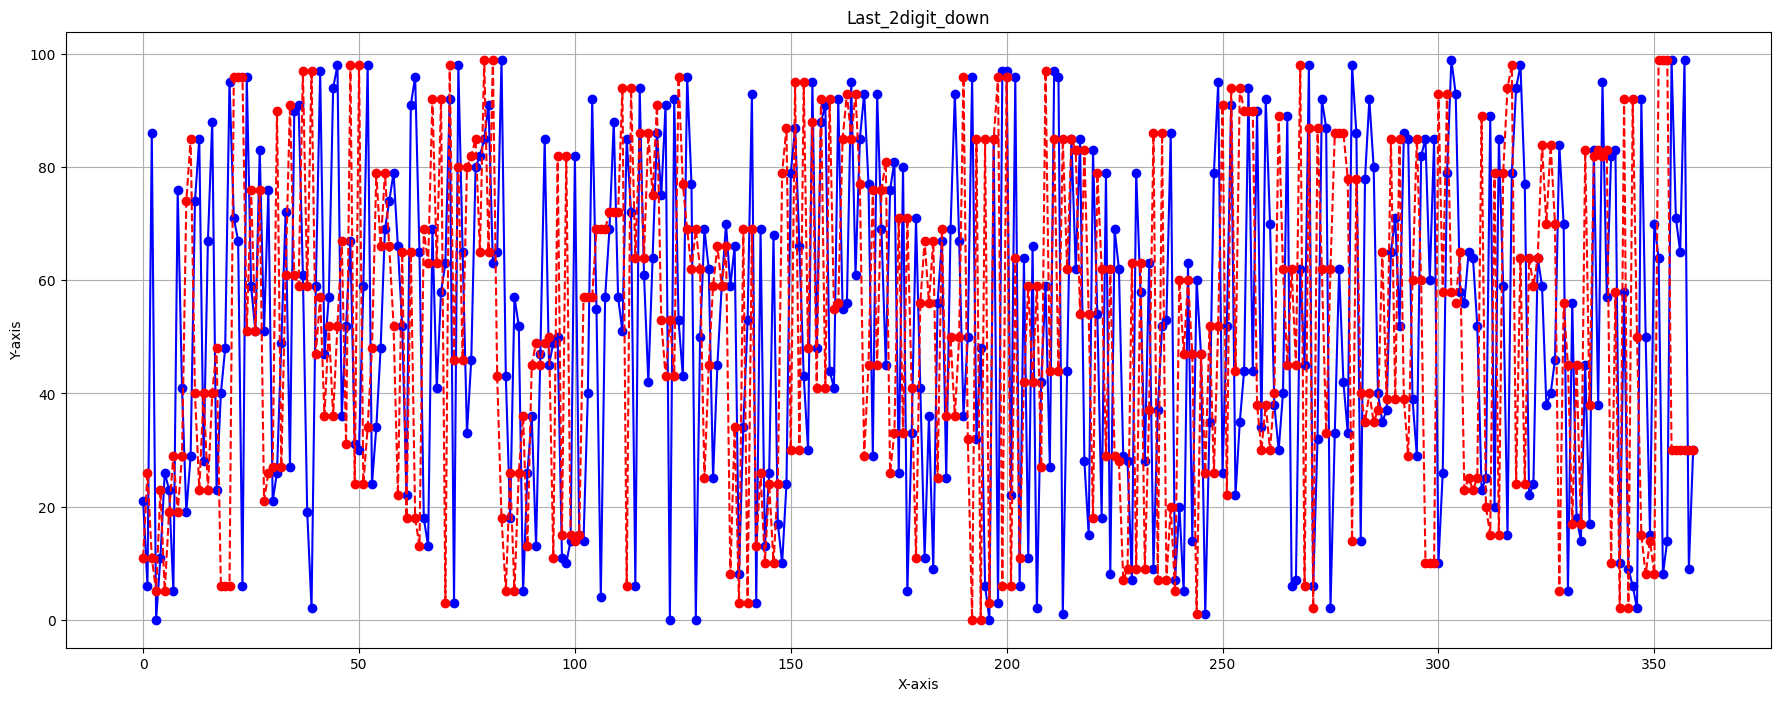

In [ ]:
#Plot graph 'Last_2digit_down'
values = df['LAST_2DIGIT_DOWN'][0:360] #เริ่มจากงวดล่าสุด
prt = ptree
# Create a line plot
plt.figure(figsize=(22,8))
plt.plot(values, marker='o', linestyle='-', color='blue', label='Data')
plt.plot(prt, marker='o', linestyle='--', color='red', label='Predict')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Last_2digit_down')

plt.grid()
plt.show()

###Random forest

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xt, yt)

#predict
prf = rf.predict(xs)

print("F1 score is",(f1_score(ys, prf, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys, prf)))

F1 score is 0.011604938271604939
Accuracy_score is 0.011111111111111112


แสดงตารางเปรียบเทียบค่า Predict, Actual และค่า Error จากการทำนาย

In [ ]:
pred_rf = pd.DataFrame({'Actual': ys, 'Predicted': prf,'Error': ys-prf})
pred_rf.head(10)

,Actual,Predicted,Error
360,58,11,47
361,94,26,68
362,82,11,71
363,98,26,72
364,69,23,46
365,72,5,67
366,21,19,2
367,69,29,40
368,29,19,10
369,17,29,-12


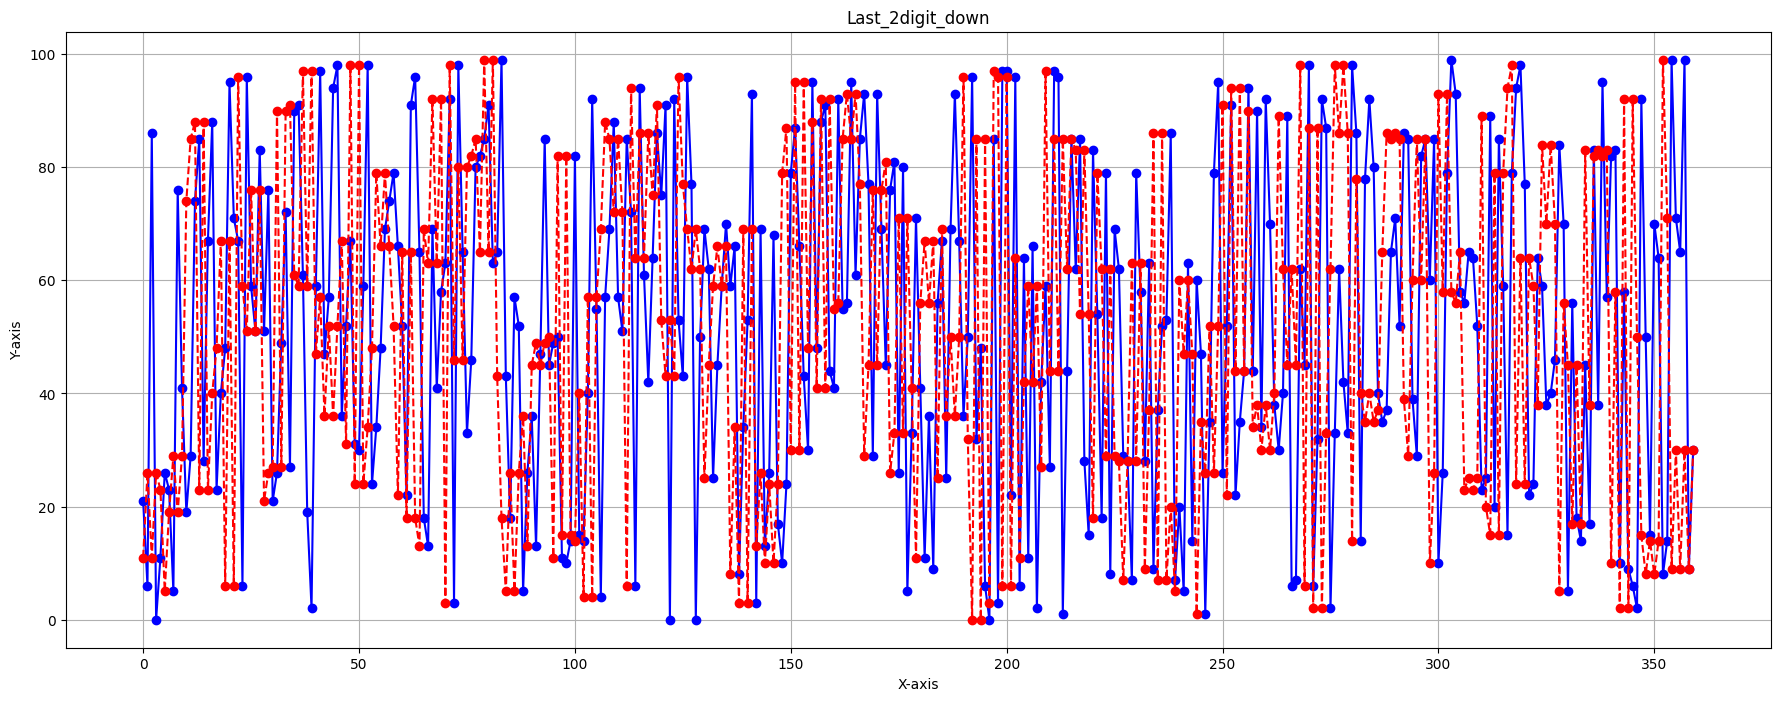

In [ ]:
#Plot graph 'Last_2digit_down'
values = df['LAST_2DIGIT_DOWN'][0:360] #เริ่มจากงวดล่าสุด
prr = prf
# Create a line plot
plt.figure(figsize=(22,8))
plt.plot(values, marker='o', linestyle='-', color='blue', label='Data')
plt.plot(prr, marker='o', linestyle='--', color='red', label='Predict')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Last_2digit_down')

plt.grid()
plt.show()

###XGboots

In [ ]:
#XGboots
!pip install xgboost==0.90
import xgboost as xgb
from xgboost import XGBClassifier
xg = xgb.XGBClassifier()
xg.fit(xt, yt)

#predict
pxg = xg.predict(xs)

print("F1 score is",(f1_score(ys, pxg, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys, pxg)))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
F1 score is 0.007783882783882783
Accuracy_score is 0.008333333333333333


In [ ]:
pred_xg = pd.DataFrame({'Actual': ys, 'Predicted': pxg,'Error': ys-pxg})
pred_xg.head(10)

,Actual,Predicted,Error
360,58,23,35
361,94,6,88
362,82,23,59
363,98,23,75
364,69,23,46
365,72,23,49
366,21,19,2
367,69,26,43
368,29,19,10
369,17,26,-9


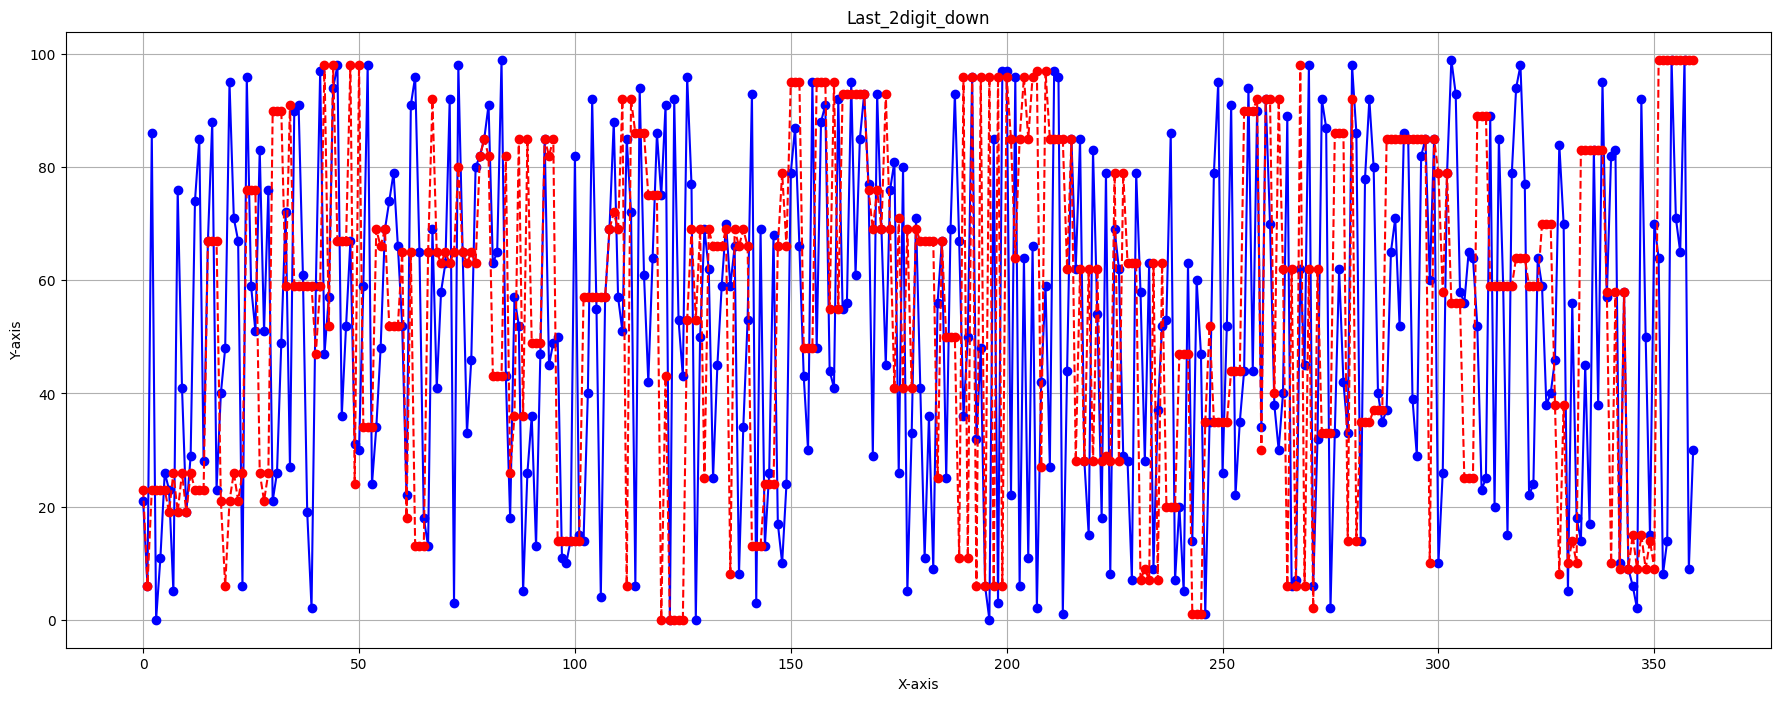

In [ ]:
#Plot graph 'Last_2digit_down'
values = df['LAST_2DIGIT_DOWN'][0:360] #เริ่มจากงวดล่าสุด
prx = pxg
# Create a line plot
plt.figure(figsize=(22,8))
plt.plot(values, marker='o', linestyle='-', color='blue', label='Data')
plt.plot(pxg, marker='o', linestyle='--', color='red', label='Predict')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Last_2digit_down')

plt.grid()
plt.show()

###Support vector machine(SVMs)

In [ ]:
#Support vector machine(SVMs)
from sklearn import svm
from sklearn.svm import SVC

#predict
svm = svm.SVC(kernel='rbf')
svm.fit(xt, yt)

psvm = svm.predict(xs)

print("F1 score is",(f1_score(ys, psvm, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys, psvm)))

F1 score is 1.538935056940597e-05
Accuracy_score is 0.002777777777777778


In [ ]:
pred_svm = pd.DataFrame({'Actual': ys, 'Predicted': psvm,'Error': ys-psvm})
pred_svm.head(10)

,Actual,Predicted,Error
360,58,85,-27
361,94,85,9
362,82,85,-3
363,98,85,13
364,69,85,-16
365,72,85,-13
366,21,85,-64
367,69,85,-16
368,29,85,-56
369,17,85,-68


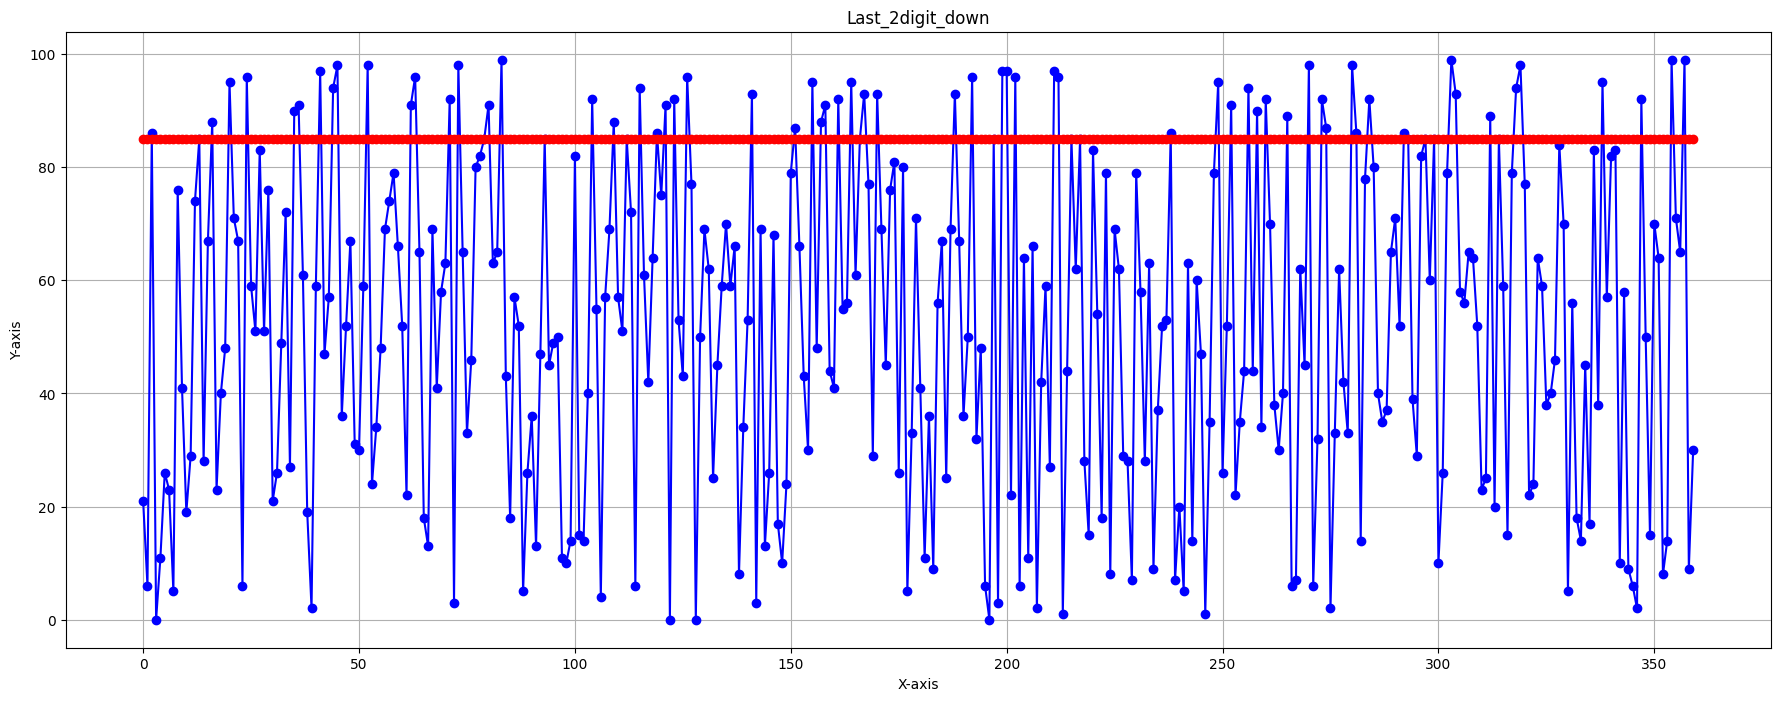

In [ ]:
#Plot graph 'Last_2digit_down'
values = df['LAST_2DIGIT_DOWN'][0:360] #เริ่มจากงวดล่าสุด
prs = psvm
# Create a line plot
plt.figure(figsize=(22,8))
plt.plot(values, marker='o', linestyle='-', color='blue', label='Data')
plt.plot(prs, marker='o', linestyle='--', color='red', label='Predict')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Last_2digit_down')

plt.grid()
plt.show()

##Best Model

<ipython-input-31-87764563c8ad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Accuracy, y=Model, palette="mako" )


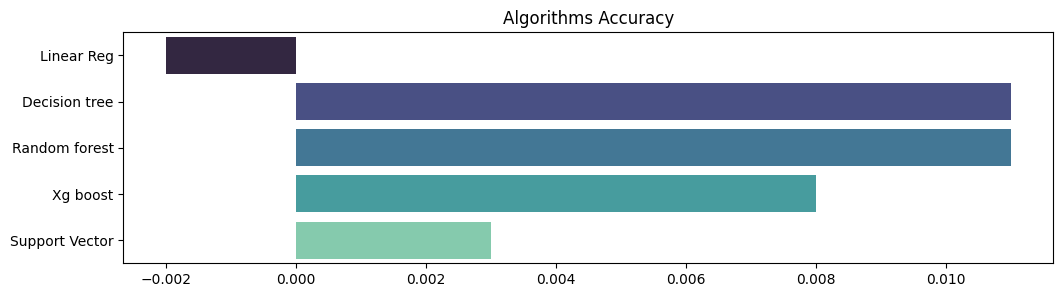

Linear Reg
Accuracy :  -0.002
-------------------------------------
Decision tree
Accuracy :  0.011
-------------------------------------
Random forest
Accuracy :  0.011
-------------------------------------
Xg boost
Accuracy :  0.008
-------------------------------------
Support Vector
Accuracy :  0.003


In [ ]:
#Compare model performance
reg = round(sm.r2_score(ys ,leg),3)
tr = round(accuracy_score(ys, ptree),3)
rd = round(accuracy_score(ys, prf),3)
xgbs = round(accuracy_score(ys, pxg),3)
sv = round(accuracy_score(ys, psvm),3)

plt.figure(figsize=(12, 3))
Accuracy =[ reg , tr , rd , xgbs , sv]
Model = [ 'Linear Reg' , 'Decision tree' , 'Random forest' , 'Xg boost' , 'Support Vector' ]

sns.barplot(x=Accuracy, y=Model, palette="mako" )
plt.title('Algorithms Accuracy')
plt.show()

print("Linear Reg")
print("Accuracy : ", reg)
print("-------------------------------------")
print("Decision tree")
print("Accuracy : ", tr)
print("-------------------------------------")
print("Random forest")
print("Accuracy : ", rd)
print("-------------------------------------")
print("Xg boost")
print("Accuracy : ", xgbs)
print("-------------------------------------")
print("Support Vector")
print("Accuracy : ", sv)

In [ ]:
# #GirdsearchCV
# from sklearn.model_selection import GridSearchCV
# param = {'num_class': [50,100],
#     'booster': ["gbtree"],
#     'seed': [100,300,500,1000]}

# xg_grid = xgb.XGBClassifier()
# model = GridSearchCV(estimator=xg_grid, param_grid = param)
# model.fit(xt, yt)
# model.best_score_
# xg2 = model.predict(xs)
# print("F1 score is",(f1_score(ys, xg2, average = 'weighted')))
# print("Accuracy_score is" ,(accuracy_score(ys, xg2)))
# pred_xg = pd.DataFrame({'Actual': ys, 'Predicted': xg2,'Error': ys-xg2})
# pred_xg.head(10)

# Predict Ten

Predict เลขตัวหน้าของ 2 ตัวล่าง(เลขหลัก 10)

<ipython-input-33-0c4b873d58be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='TEN', data=df,palette='Set2')


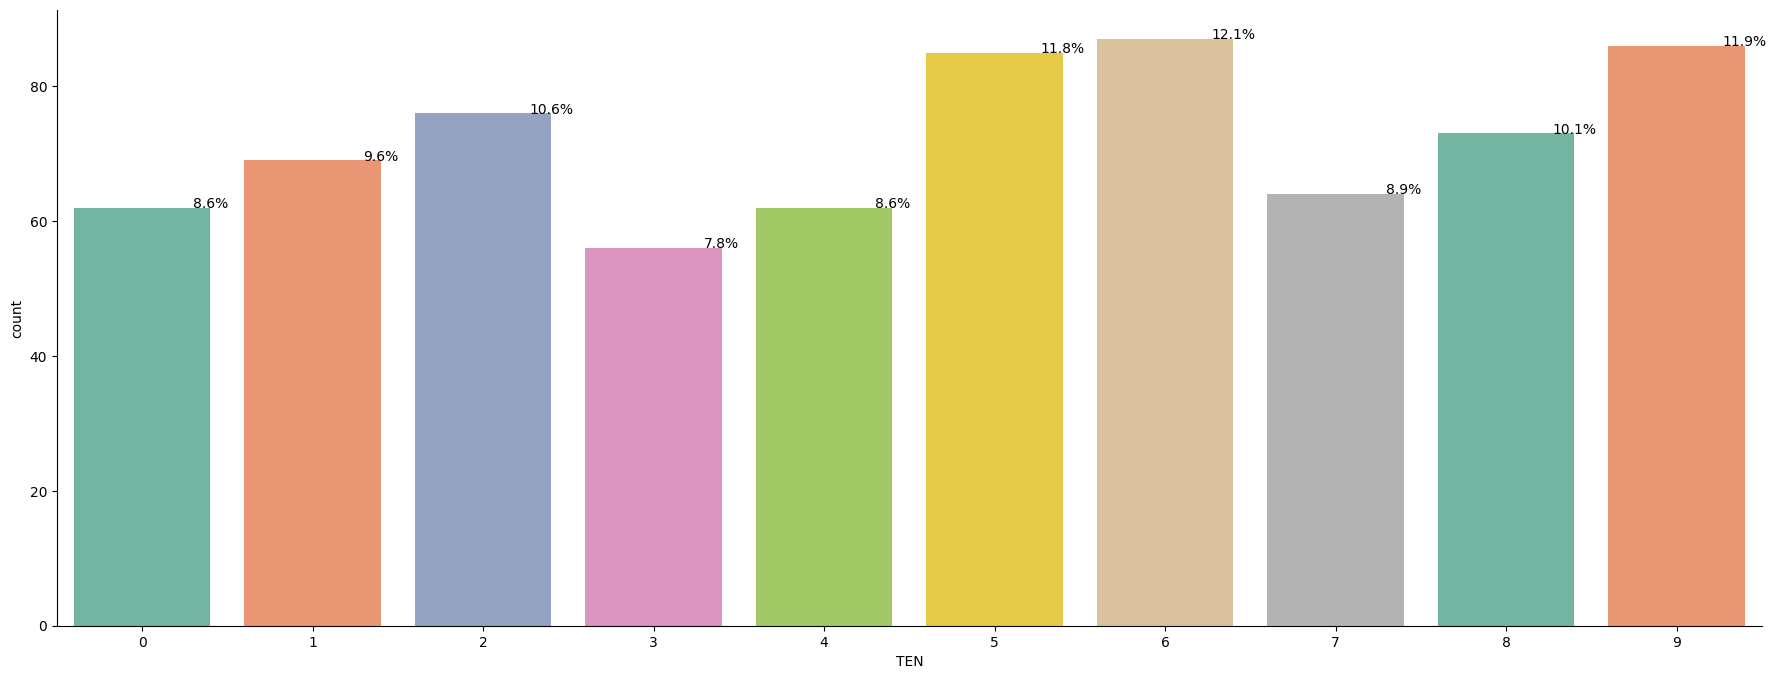

In [ ]:
#ดูว่าเลขหลัก 10 ไหนออกบ่อยสุด หรือหลักไหนออกน้อยสุดใน 30 ปีที่ผ่านมา
plt.figure(figsize=(22,8))
ax = sns.countplot(x='TEN', data=df,palette='Set2')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

Train-Test Data

In [ ]:
x1 = df[['TIME','PERIOD']] #Time
y1 = df['TEN']
from sklearn.model_selection import train_test_split
x_train1 = x1[:-360]
x_test1 = x1[-360:]
y_train1 = y1[:-360]
y_test1 = y1[-360:]

In [ ]:
xt1= x_train1.values.reshape(-1,2)
xs1= x_test1.values.reshape(-1,2)
yt1= y_train1
ys1= y_test1

###Linear regression

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xt1,yt1)

#Predict
leg1 = model.predict(xs1)

#MAE
print('MAE :',mean_absolute_error(ys1,leg1))
#R2
print("R2 score :", round(sm.r2_score(ys1 ,leg1),2))

MAE : 47.66900719291205
R2 score : -286.69


###Decision tree

In [ ]:
#Decision tree Model
from sklearn import tree
tree1 = tree.DecisionTreeClassifier()
tree1.fit(xt1,yt1)

#predict
ptree1 = tree1.predict(xs1)

print("F1 score is",(f1_score(ys1, ptree1, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys1, ptree1)))

F1 score is 0.08707302209844231
Accuracy_score is 0.08888888888888889


###Random forest

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(xt1, yt1)

#predict
prf1 = rf1.predict(xs1)

print("F1 score is",(f1_score(ys1, prf1, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys1, prf1)))

F1 score is 0.09068201875223268
Accuracy_score is 0.09444444444444444


###XGboots

In [ ]:
#XGboots
!pip install xgboost==0.90
import xgboost as xgb
from xgboost import XGBClassifier
xg1 = xgb.XGBClassifier()
xg1.fit(xt1, yt1)

#predict
pxg1 = xg1.predict(xs1)

print("F1 score is",(f1_score(ys1, pxg1, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys1, pxg1)))

F1 score is 0.08474449238299234
Accuracy_score is 0.08888888888888889


###Support vector machine(SVMs)

In [ ]:
#Support vector machine(SVMs)
from sklearn import svm
from sklearn.svm import SVC

#predict
svm1 = svm.SVC(kernel='rbf')
svm1.fit(xt1, yt1)

psvm1 = svm1.predict(xs1)

print("F1 score is",(f1_score(ys1, psvm1, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys1, psvm1)))

F1 score is 0.018181818181818184
Accuracy_score is 0.1


###Best Model

<ipython-input-41-d24abe80848b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Accuracy, y=Model, palette="mako" )


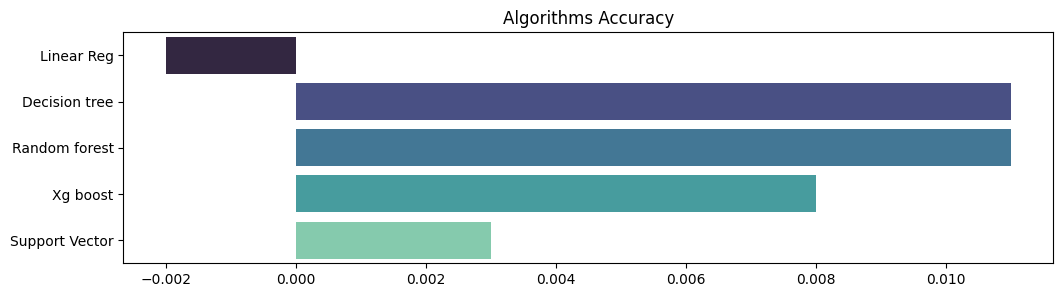

Linear Reg
Accuracy :  -286.692
-------------------------------------
Decision tree
Accuracy :  0.089
-------------------------------------
Random forest
Accuracy :  0.094
-------------------------------------
Xg boost
Accuracy :  0.089
-------------------------------------
Support Vector
Accuracy :  0.1


In [ ]:
#Compare model performance
reg1 = round(sm.r2_score(ys1 ,leg1),3)
tr1 = round(accuracy_score(ys1, ptree1),3)
rd1 = round(accuracy_score(ys1, prf1),3)
xgbs1 = round(accuracy_score(ys1, pxg1),3)
sv1 = round(accuracy_score(ys1, psvm1),3)

plt.figure(figsize=(12, 3))
Accuracy =[ reg , tr , rd , xgbs , sv]
Model = [ 'Linear Reg' , 'Decision tree' , 'Random forest' , 'Xg boost' , 'Support Vector' ]

sns.barplot(x=Accuracy, y=Model, palette="mako" )
plt.title('Algorithms Accuracy')
plt.show()

print("Linear Reg")
print("Accuracy : ", reg1)
print("-------------------------------------")
print("Decision tree")
print("Accuracy : ", tr1)
print("-------------------------------------")
print("Random forest")
print("Accuracy : ", rd1)
print("-------------------------------------")
print("Xg boost")
print("Accuracy : ", xgbs1)
print("-------------------------------------")
print("Support Vector")
print("Accuracy : ", sv1)

In [ ]:
# #GirdsearchCV
# from sklearn.model_selection import GridSearchCV
# param = {'num_class': [50,100],
#     'booster': ["gbtree"],
#     'seed': [100,300,500,1000]}

# xg_grid1 = xgb.XGBClassifier()
# model1 = GridSearchCV(estimator=xg_grid, param_grid = param)
# model1.fit(xt1, yt1)
# model1.best_score_
# xgt = model1.predict(xs1)
# pred_xg1 = pd.DataFrame({'Actual': ys1, 'Predicted': xgt,'Error': ys1-xgt})
# pred_xg1.head(10)

# Predict Unit

Predict เลขตัวหลังของ 2 ตัวล่าง(เลขหลักหน่วย)

<ipython-input-43-d8534e9a19d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='UNIT', data=df,palette='Set2')


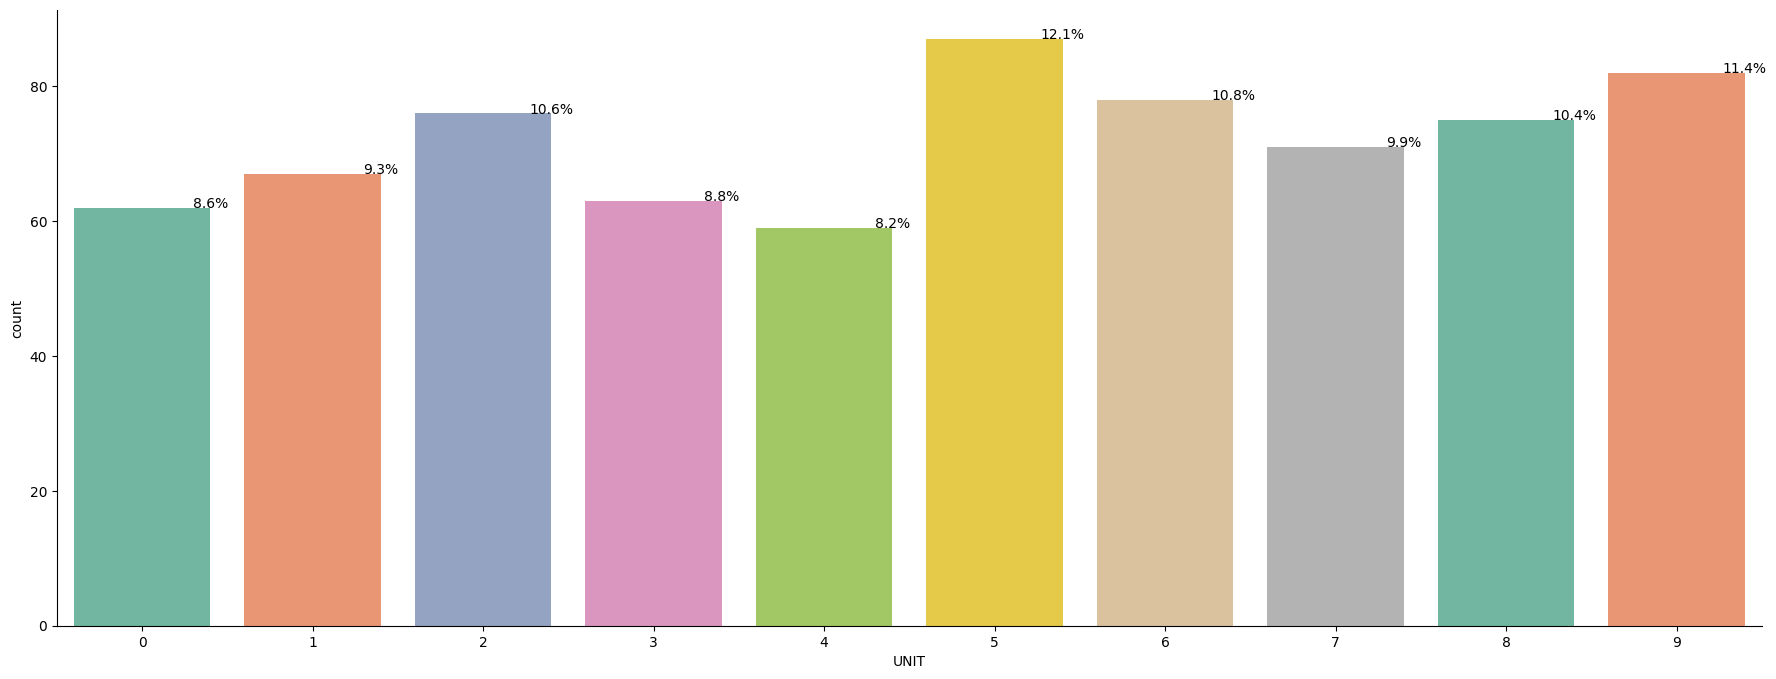

In [ ]:
#ดูว่าเลขหลักหน่วย หลักไหนออกบ่อยสุด หรือหลักไหนออกน้อยสุดใน 30 ปีที่ผ่านมา
plt.figure(figsize=(22,8))
ax = sns.countplot(x='UNIT', data=df,palette='Set2')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

Train-Test Data

In [ ]:
x2 = df[['TIME','PERIOD']] #Time
y2 = df['UNIT']
from sklearn.model_selection import train_test_split
x_train2 = x2[:-360]
x_test2 = x2[-360:]
y_train2 = y2[:-360]
y_test2 = y2[-360:]

In [ ]:
xt2= x_train2.values.reshape(-1,2)
xs2= x_test2.values.reshape(-1,2)
yt2= y_train2
ys2= y_test2

###Linear regression

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(xt2,yt2)

#Predict
leg2 = model.predict(xs)

#MAE
print('MAE :',mean_absolute_error(ys2,leg2))
#R2
print("R2 score :", round(sm.r2_score(ys2 ,leg2),2))

MAE : 47.5495627484676
R2 score : -274.17


###Decision tree

In [ ]:
#Decision tree Model
from sklearn import tree
tree2 = tree.DecisionTreeClassifier()
tree2.fit(xt2,yt2)

#predict
ptree2 = tree2.predict(xs2)

print("F1 score is",(f1_score(ys2, ptree2, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys2, ptree2)))

F1 score is 0.11208706785360442
Accuracy_score is 0.1111111111111111


###Random forest

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier()
rf2.fit(xt2, yt2)

#predict
prf2 = rf2.predict(xs2)

print("F1 score is",(f1_score(ys2, prf2, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys2, prf2)))

F1 score is 0.10828472431489947
Accuracy_score is 0.10833333333333334


###XGboots

In [ ]:
#XGboots
!pip install xgboost==0.90
import xgboost as xgb
from xgboost import XGBClassifier
xg2 = xgb.XGBClassifier()
xg2.fit(xt2, yt2)

#predict
pxg2 = xg2.predict(xs2)

print("F1 score is",(f1_score(ys2, pxg2, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys2, pxg2)))

F1 score is 0.08922552546079719
Accuracy_score is 0.08888888888888889


###Support vector machine(SVMs)

In [ ]:
#Support vector machine(SVMs)
from sklearn import svm
from sklearn.svm import SVC

#predict
svm2 = svm.SVC(kernel='rbf')
svm2.fit(xt, yt)

psvm2 = svm2.predict(xs2)

print("F1 score is",(f1_score(ys2, psvm2, average = 'weighted')))
print("Accuracy_score is" ,(accuracy_score(ys2, psvm2)))

F1 score is 0.0
Accuracy_score is 0.0


###Best model

<ipython-input-79-dc59f9cdde43>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Accuracy, y=Model, palette="mako" )


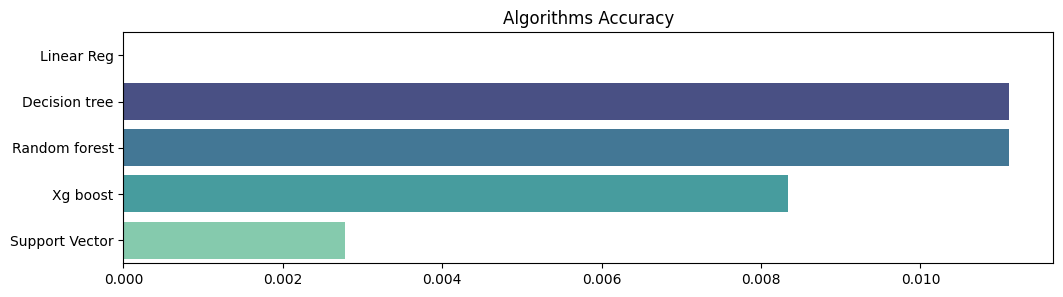

Linear Reg
Accuracy :  -0.002
-------------------------------------
Decision tree
Accuracy :  0.011
-------------------------------------
Random forest
Accuracy :  0.011
-------------------------------------
Xg boost
Accuracy :  0.008
-------------------------------------
Support Vector
Accuracy :  0.003


In [ ]:
#Compare model performance
reg = round(sm.r2_score(ys ,leg),2)
tr = accuracy_score(ys, ptree)
rd = accuracy_score(ys, prf)
xgbs = accuracy_score(ys, pxg)
sv = accuracy_score(ys, psvm)

plt.figure(figsize=(12, 3))
Accuracy =[ reg , tr , rd , xgbs , sv]
Model = [ 'Linear Reg' , 'Decision tree' , 'Random forest' , 'Xg boost' , 'Support Vector' ]

sns.barplot(x=Accuracy, y=Model, palette="mako" )
plt.title('Algorithms Accuracy')
plt.show()

print("Linear Reg")
print("Accuracy : ", round(sm.r2_score(ys ,leg),3))
print("-------------------------------------")
print("Decision tree")
print("Accuracy : ", round(accuracy_score(ys, ptree),3))
print("-------------------------------------")
print("Random forest")
print("Accuracy : ", round(accuracy_score(ys, prf),3))
print("-------------------------------------")
print("Xg boost")
print("Accuracy : ", round(accuracy_score(ys, pxg),3))
print("-------------------------------------")
print("Support Vector")
print("Accuracy : ", round(accuracy_score(ys, psvm),3))

In [ ]:
# #GirdsearchCV
# from sklearn.model_selection import GridSearchCV
# param = {'num_class': [50,100],
#     'booster': ["gbtree"],
#     'seed': [100,300,500,1000]}

# xg_grid2 = xgb.XGBClassifier()
# model2 = GridSearchCV(estimator=xg_grid, param_grid = param)
# model2.fit(xt2, yt2)
# model2.best_score_
# xgu = model2.predict(xs2)
# print("F1 score is",(f1_score(ys2, xgu, average = 'weighted')))
# print("Accuracy_score is" ,(accuracy_score(ys2, xgu)))
# pred_xg2 = pd.DataFrame({'Actual': ys2, 'Predicted': xgu,'Error': ys2-xgu})
# pred_xg2.head(10)

#Predict New data

ทำนายตัวเลขงวดที่ 721 ครั้งที่ 1 วันที่ 1 ตุลาคม พ.ศ 2566

In [ ]:
new = np.array([[721,1]])
##------2digit------
#Decition Tree
dct = tree.predict(new)[0]

##------Ten------
#random Forest
rdfr1 = rf1.predict(new)[0]

##------Unit------
#Decition Tree
dct2 = tree2.predict(new)[0]

print("2 Digit Down :", dct,"\n"
      "Ten Digit:",rdfr1,"\n"
      "Units Digit:",dct2 )

2 Digit Down : 30 
Ten Digit: 0 
Units Digit: 0
